
## CNN With Custom Images

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.


This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
my_data_dir = '/content/drive/MyDrive/Clarusway - ML2/1- Projects/05_C9_DL1-CNN-CatDog-Classifier/data'

In [13]:
pwd

'/content'

In [4]:
#Kaggle data
# my_data_dir = '../input/dog-cat/data' 

In [14]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['train', 'test']

In [15]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'
validation_path = my_data_dir+'/validation/'
cat_path = train_path+'cat/'
dog_path = train_path+'dog/'

In [16]:
os.listdir(test_path)

['6176.jpg',
 '6181.jpg',
 '6180.jpg',
 '6178.jpg',
 '6179.jpg',
 '6177.jpg',
 '6184.jpg',
 '6186.jpg',
 '6183.jpg',
 '6185.jpg',
 '6182.jpg',
 '6188.jpg',
 '6187.jpg',
 '6189.jpg',
 '6193.jpg',
 '6191.jpg',
 '6190.jpg',
 '6194.jpg',
 '6192.jpg',
 '6195.jpg',
 '6196.jpg',
 '6198.jpg',
 '6199.jpg',
 '6200.jpg',
 '6197.jpg',
 '6204.jpg',
 '6203.jpg',
 '6205.jpg',
 '6206.jpg',
 '6201.jpg',
 '6202.jpg',
 '6211.jpg',
 '6207.jpg',
 '6208.jpg',
 '6209.jpg',
 '6210.jpg',
 '6214.jpg',
 '6215.jpg',
 '6212.jpg',
 '6213.jpg',
 '6219.jpg',
 '6216.jpg',
 '6218.jpg',
 '6217.jpg',
 '6222.jpg',
 '6223.jpg',
 '6221.jpg',
 '6220.jpg',
 '6224.jpg',
 '6225.jpg',
 '6226.jpg',
 '6227.jpg',
 '6228.jpg',
 '6232.jpg',
 '6230.jpg',
 '6231.jpg',
 '6229.jpg',
 '6234.jpg',
 '6233.jpg',
 '6235.jpg',
 '6238.jpg',
 '6237.jpg',
 '6236.jpg',
 '6239.jpg',
 '6242.jpg',
 '6240.jpg',
 '6241.jpg',
 '6244.jpg',
 '6246.jpg',
 '6243.jpg',
 '6245.jpg',
 '6248.jpg',
 '6247.jpg',
 '6249.jpg',
 '6251.jpg',
 '6250.jpg',
 '6252.jpg',

In [17]:
os.listdir(train_path)

['cat']

In [18]:
os.listdir(cat_path)

['cat.8618.jpg',
 'cat.8616.jpg',
 'cat.8620.jpg',
 'cat.862.jpg',
 'cat.8621.jpg',
 'cat.8622.jpg',
 'cat.8623.jpg',
 'cat.8624.jpg',
 'cat.8627.jpg',
 'cat.8626.jpg',
 'cat.8625.jpg',
 'cat.863.jpg',
 'cat.8628.jpg',
 'cat.8629.jpg',
 'cat.8630.jpg',
 'cat.8631.jpg',
 'cat.8632.jpg',
 'cat.8633.jpg',
 'cat.8634.jpg',
 'cat.8636.jpg',
 'cat.8635.jpg',
 'cat.8638.jpg',
 'cat.8637.jpg',
 'cat.8640.jpg',
 'cat.8641.jpg',
 'cat.8639.jpg',
 'cat.864.jpg',
 'cat.8644.jpg',
 'cat.8643.jpg',
 'cat.8642.jpg',
 'cat.8645.jpg',
 'cat.8646.jpg',
 'cat.8647.jpg',
 'cat.8648.jpg',
 'cat.8650.jpg',
 'cat.8649.jpg',
 'cat.865.jpg',
 'cat.8652.jpg',
 'cat.8653.jpg',
 'cat.8654.jpg',
 'cat.8651.jpg',
 'cat.8655.jpg',
 'cat.8658.jpg',
 'cat.8659.jpg',
 'cat.8657.jpg',
 'cat.8656.jpg',
 'cat.8660.jpg',
 'cat.8662.jpg',
 'cat.8661.jpg',
 'cat.866.jpg',
 'cat.8664.jpg',
 'cat.8663.jpg',
 'cat.8667.jpg',
 'cat.8665.jpg',
 'cat.8666.jpg',
 'cat.8668.jpg',
 'cat.8670.jpg',
 'cat.867.jpg',
 'cat.8669.jpg',
 'c

In [19]:
os.listdir(cat_path)[7]

'cat.8624.jpg'

In [20]:
cat_img = cat_path+'cat.2842.jpg'

In [21]:
imread(cat_img)

array([[[  4,   4,   6],
        [  6,   6,   8],
        [  9,   9,  11],
        ...,
        [ 34,  17,   9],
        [ 34,  17,   9],
        [ 34,  17,   9]],

       [[  9,   9,  11],
        [ 10,  10,  12],
        [ 11,  11,  13],
        ...,
        [ 34,  17,   9],
        [ 34,  17,   9],
        [ 34,  17,   9]],

       [[ 15,  15,  17],
        [ 13,  13,  15],
        [ 11,  11,  13],
        ...,
        [ 34,  17,   9],
        [ 34,  17,   9],
        [ 34,  17,   9]],

       ...,

       [[116,  67,  26],
        [118,  69,  28],
        [119,  70,  29],
        ...,
        [111,  67,  30],
        [111,  67,  30],
        [112,  68,  31]],

       [[118,  69,  28],
        [120,  71,  30],
        [122,  73,  32],
        ...,
        [110,  66,  29],
        [110,  66,  29],
        [110,  66,  29]],

       [[122,  73,  32],
        [125,  76,  35],
        [128,  79,  38],
        ...,
        [111,  67,  30],
        [111,  67,  30],
        [111,  67,  30]]

In [22]:
cat_img = imread(cat_img)

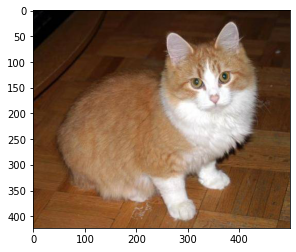

In [23]:
plt.imshow(cat_img)

In [24]:
cat_img.shape

(423, 499, 3)

In [27]:
os.listdir(dog_path)

FileNotFoundError: ignored

In [ ]:
one_dog = train_path+'dog/'+os.listdir(train_path+'dog')[7]

In [ ]:
imread(one_dog)

In [ ]:
def see(file):
    img = imread(file)
    plt.imshow(img)

In [ ]:
see(one_dog)

**Let's check how many images there are.**

In [ ]:
len(os.listdir(cat_path))

In [ ]:
len(os.listdir(dog_path))

**Let's find out the average dimensions of these images.**

In [ ]:
train_path

In [ ]:
#collect sizes of images
def collect_sizes(path) :
    x= []
    y = []
    for image in os.listdir(path):

        img = imread(path+'/'+image)
        d1,d2,colors = img.shape
        x.append(d1)
        y.append(d2)
    return x, y

In [ ]:
x, y = collect_sizes(cat_path)

In [ ]:
sns.scatterplot(x,y)

There are some outliers, or just one.

In [ ]:
images = []
for image in os.listdir(cat_path):
    path =cat_path+image
    img = imread(path)
    d1,d2,colors = img.shape
    if(d1 > 600):
        images.append(image)
#     x.append(d1)
#     y.append(d2)
images

In [ ]:
cat = cat_path+images[0]
see(cat)

In [ ]:
np.mean(x), np.mean(y)

In [ ]:
x, y = collect_sizes(dog_path)

In [ ]:
sns.scatterplot(x,y)

In [ ]:
images = []
for image in os.listdir(train_path+'dog'):
    path =train_path+'dog/'+image
    img = imread(path)
    d1,d2,colors = img.shape
    if(d1 > 600):
        images.append(image)
#     x.append(d1)
#     y.append(d2)
images

In [ ]:
dog = dog_path+images[0]
see(dog)

In [ ]:
np.mean(x), np.mean(y)

scale-up ve scale-down yapmam gerekecek. bana en uygun boyutu belirledim.

In [ ]:
image_shape = (350,410,3)

## Preparing the Data for the model

In [ ]:
dog_img = imread(dog)
dog_img.max()

In [ ]:
cat_img = imread(cat)
cat_img.max()

I will need to rescale the images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
help(ImageDataGenerator)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

In [ ]:
plt.imshow(cat_img)

In [ ]:
plt.imshow(image_gen.random_transform(cat_img))

In [ ]:
image_gen.flow_from_directory(train_path)

In [ ]:
test_path

In [ ]:
image_gen.flow_from_directory(test_path)

# Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

## Training the Model

In [ ]:
#help(image_gen.flow_from_directory)

In [ ]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

In [ ]:
val_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

In [ ]:
train_image_gen.class_indices

In [ ]:
val_image_gen.class_indices

In [ ]:
# model.fit(x_train,y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))

In [ ]:
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=val_image_gen, callbacks=[early_stop])

# Evaluating the Model

In [ ]:
summary = pd.DataFrame(model.history.history)
summary

In [ ]:
losses = pd.DataFrame(summary.loss, summary.val_loss)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
model.metrics_names

In [ ]:
model.evaluate_generator(val_image_gen)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = model.predict_generator(val_image_gen)

In [ ]:
pred_probabilities

In [ ]:
val_image_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(val_image_gen.classes,predictions))

In [ ]:
confusion_matrix(val_image_gen.classes,predictions)

In [ ]:
model.save('dog_cat_model.h5')

# Predicting on an Image

In [ ]:
one_dog

In [ ]:
my_image = image.load_img(one_dog,target_size=image_shape)

In [ ]:
my_image

In [ ]:
type(my_image)

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

In [ ]:
my_image.shape

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

In [ ]:
model.predict(my_image)

In [ ]:
train_image_gen.class_indices

In [ ]:
val_image_gen.class_indices